---
## Section 1: Preparing the environment

**IF USING COLAB // KAGGLE**:

Uncomment the lines of code below and run them in order. The top, the second, and the last cells only need to be run once, but **the third cells (envStr) need to be re-run if the Colab // Kaggle notebook crashes**. These blocks install the needed dependencies and set up your environment. Notice that the first and third cell contents depend on whether you use Colab or Kaggle.

In [3]:
# @markdown Colab // Kaggle installation (Part 1)

! git clone https://github.com/neuromatch/ComputationThruDynamicsBenchmark
%cd ComputationThruDynamicsBenchmark
! pip install -e .

## RUN THIS CELL, THEN RESTART SESSION AS PROMPTED (BUTTON AT BOTTOM OF THIS CELL'S FINISHED OUTPUT). DO NOT NEED TO RUN AGAIN
## PLEASE RESTART THE ENVIRONMENT FOR KAGGLE MANUALLY (Run > Restart & clear cell outputs)

Cloning into 'ComputationThruDynamicsBenchmark'...
remote: Enumerating objects: 3359, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 3359 (delta 208), reused 192 (delta 192), pack-reused 3126
Receiving objects: 100% (3359/3359), 296.10 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (1882/1882), done.
Updating files: 100% (262/262), done.
/content/ComputationThruDynamicsBenchmark
Obtaining file:///content/ComputationThruDynamicsBenchmark
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-

In [1]:
# @markdown Colab // Kaggle installation (Part 2)

!pip uninstall -y torchaudio torchvision

Found existing installation: torchaudio 2.3.1+cu121
Uninstalling torchaudio-2.3.1+cu121:
  Successfully uninstalled torchaudio-2.3.1+cu121
Found existing installation: torchvision 0.18.1+cu121
Uninstalling torchvision-0.18.1+cu121:
  Successfully uninstalled torchvision-0.18.1+cu121


In [2]:
# @markdown Colab // Kaggle installation (Part 3)

## GET BACK TO THE DIRECTORY AND CONFIGURE .env

################ COLAB #####################

%cd /content/ComputationThruDynamicsBenchmark/
envStr = """HOME_DIR=/content/ComputationThruDynamicsBenchmark/
#Don't change these
TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
EVAL_TARGET_FILE=eval_target.h5
"""

#############################################

################ KAGGLE #####################

# %cd /kaggle/working/ComputationThruDynamicsBenchmark/
# envStr = """HOME_DIR=/kaggle/working/ComputationThruDynamicsBenchmark/
# #Don't change these
# TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
# EVAL_TARGET_FILE=eval_target.h5
# """

##############################################

################ COLAB // KAGGLE #####################

with open('.env','w') as f:
  f.write(envStr)

##############################################

/content/ComputationThruDynamicsBenchmark


In [3]:
# @markdown Colab // Kaggle installation (Part 4)

!git clone https://github.com/mitchellostrow/DSA
%cd DSA/
!pip install -e .

Cloning into 'DSA'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 340 (delta 16), reused 24 (delta 14), pack-reused 304
Receiving objects: 100% (340/340), 1.52 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (189/189), done.
/content/ComputationThruDynamicsBenchmark/DSA
Obtaining file:///content/ComputationThruDynamicsBenchmark/DSA
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 14.6 MB/s eta 0:00:00
  Running setup.py develop for DSA


---
## Section 2: Import fig 3

In [4]:
# #install the packages that we haven't added in setup.py
! pip install matplotlib
! pip install scikit-learn
! pip install seaborn
! pip install pandas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from DSA import DSA
from DSA.dmd import DMD
from DSA.simdist import SimilarityTransformDist
from sklearn.manifold import MDS

rng = np.random.default_rng(2023)

In [5]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/Colab Notebooks/Vanilla_RNN_128_RT_out_dict.pkl', 'rb') as file:
    rnn_1_data = pickle.load(file)

with open('/content/drive/MyDrive/Colab Notebooks/Noisy_GRU_RNN_128_RT_out_dict.pkl', 'rb') as file:
    rnn_2_data = pickle.load(file)

with open('/content/drive/MyDrive/Colab Notebooks/GRU_RNN_128_RT_out_dict.pkl', 'rb') as file:
    rnn_3_data = pickle.load(file)

with open('/content/drive/MyDrive/Colab Notebooks/Driscoll_RNN_128_RT_out_dict.pkl', 'rb') as file:
    rnn_4_data = pickle.load(file)

# from google.colab import files
# files.upload()

Mounted at /content/drive


In [6]:
np.arange(0,rnn_1_data['latents'].shape[0], 100)

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [25]:
def get_dsa_scores(rnn_1_data, rnn_2_data):
  dsa_scores = []
  # for trial in tqdm.tqdm(range(rnn_1_data['latents'].shape[0])):
  for trial in tqdm(np.arange(0,rnn_1_data['latents'].shape[0], 50)):

    rnn_1_latents = rnn_1_data['latents'][trial,:,:]
    rnn_1_dmd = DMD(rnn_1_latents, n_delays=50)
    rnn_1_dmd.fit()
    rnn_1_embeddings = rnn_1_dmd.H

    rnn_2_latents = rnn_2_data['latents'][trial,:,:]
    rnn_2_dmd = DMD(rnn_2_latents, n_delays=50)
    rnn_2_dmd.fit()
    rnn_2_embeddings = rnn_2_dmd.H

    comparison_dmd = SimilarityTransformDist(iters=2000,lr=1e-3)
    dsa_score = comparison_dmd.fit_score(rnn_1_dmd.A_v.detach().numpy(), rnn_2_dmd.A_v.detach().numpy())
    dsa_scores.append(dsa_score)

  dsa_average = np.mean(dsa_scores)
  # print(f"Average DSA Score: {dsa_average}")
  return dsa_scores, dsa_average

In [26]:
import itertools
from tqdm.notebook import tqdm

rnn_list = list([rnn_1_data, rnn_2_data, rnn_3_data, rnn_4_data])
results = []
other_results = []
comb_rnn_list = list(itertools.combinations(rnn_list, 2)) # Print all pairs for pair in pairs: print(pair)
for comb in tqdm(comb_rnn_list):
  rnn_a = comb[0]
  rnn_b = comb[1]

  dsa_score_array, dsa_average = get_dsa_scores(rnn_a, rnn_b)
  results.append(dsa_average)
  other_results.append(dsa_score_array)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [17]:
print(results) # 10 iters

[0.53975695, 0.44513482, 0.38585433, 0.49593186, 0.49297133, 0.4784894]


20
[array(0.24370617, dtype=float32), array(0.3845113, dtype=float32), array(0.34387684, dtype=float32), array(0.33088797, dtype=float32), array(0.62259686, dtype=float32), array(0.40084395, dtype=float32), array(0.80457646, dtype=float32), array(0.45351467, dtype=float32), array(0.5652702, dtype=float32), array(0.2805774, dtype=float32), array(0.76550394, dtype=float32), array(0.44889033, dtype=float32), array(0.68351614, dtype=float32), array(0.3162102, dtype=float32), array(0.35405216, dtype=float32), array(0.572419, dtype=float32), array(0.36882734, dtype=float32), array(0.40469468, dtype=float32), array(0.6524749, dtype=float32), array(0.42118135, dtype=float32)]
20
[array(0.5931509, dtype=float32), array(0.5681951, dtype=float32), array(0.36782762, dtype=float32), array(0.5830688, dtype=float32), array(0.3329323, dtype=float32), array(0.5570524, dtype=float32), array(0.5892986, dtype=float32), array(0.355464, dtype=float32), array(0.37969282, dtype=float32), array(0.8681661, dtyp

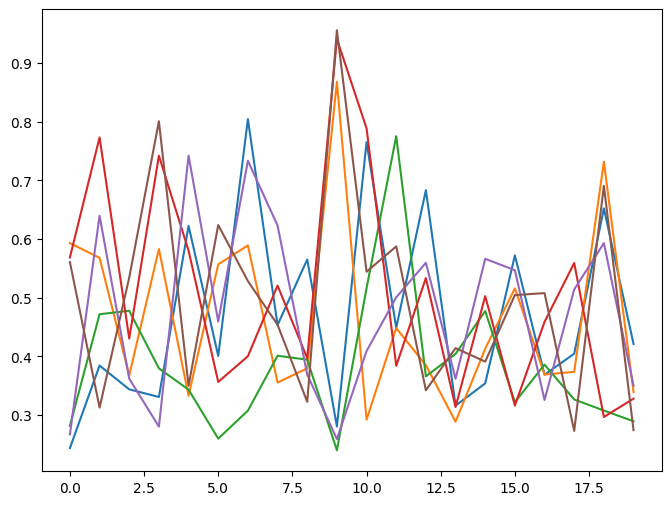

In [41]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for model_results in other_results:
  print(len(model_results))
  print(model_results)
  ax.plot(model_results)
plt.show()

In [27]:
# 20 iters
results_20 = results
print(results_20)

[0.4709066, 0.46763247, 0.38648987, 0.50968593, 0.47325057, 0.4987537]


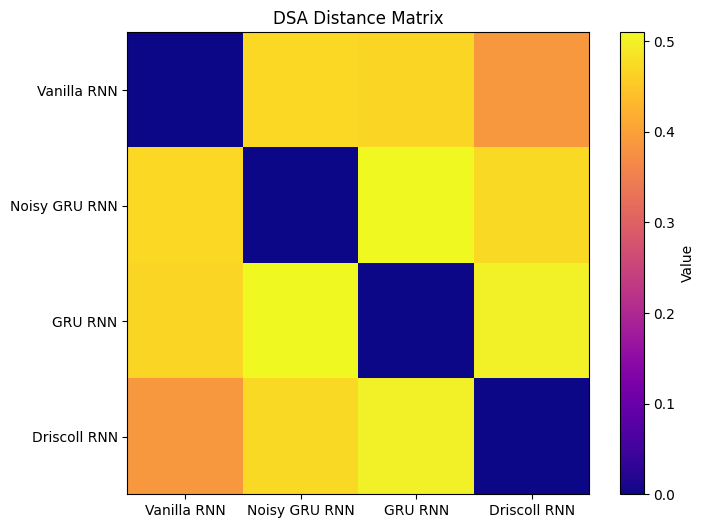

In [30]:
matrix = np.zeros((4,4))
matrix[0,1] = results[0]
matrix[0,2] = results[1]
matrix[0,3] = results[2]
matrix[1,2] = results[3]
matrix[1,3] = results[4]
matrix[2,3] = results[5]
# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(matrix+matrix.T, cmap='plasma', interpolation='nearest')
plt.colorbar(label='Value')
# Add labels
plt.title('DSA Distance Matrix')
plt.xticks(range(4), ['Vanilla RNN', 'Noisy GRU RNN', 'GRU RNN', 'Driscoll RNN'])
plt.yticks(range(4), ['Vanilla RNN', 'Noisy GRU RNN', 'GRU RNN', 'Driscoll RNN'])
# plt.xlabel('Column')
# plt.ylabel('Row')
# Show the plot
plt.show()

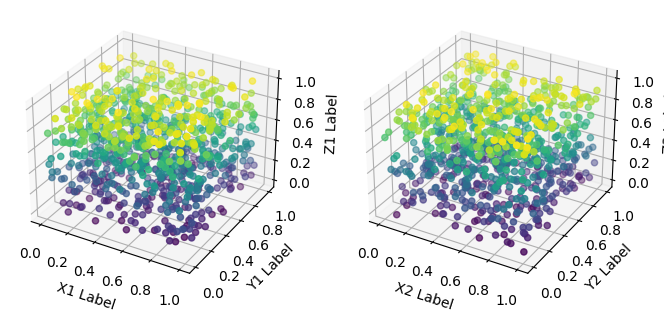

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax_1 = fig.add_subplot(121, projection='3d')
x = rnn_1_embeddings[:,0]
y = rnn_1_embeddings[:,2]
z = rnn_1_embeddings[:,4]
ax_1.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax_1.set_xlabel('X1 Label')
ax_1.set_ylabel('Y1 Label')
ax_1.set_zlabel('Z1 Label')

ax_2 = fig.add_subplot(122, projection='3d')
x = rnn_2_embeddings[:,0]
y = rnn_2_embeddings[:,2]
z = rnn_2_embeddings[:,4]
ax_2.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax_2.set_xlabel('X2 Label')
ax_2.set_ylabel('Y2 Label')
ax_2.set_zlabel('Z2 Label')

plt.show()

In [ ]:
faux_data_1 = torch.rand(size=(1000,5))
faux_data_2 = torch.rand(size=(1000,5))
sns.lineplot(data=faux_data_1)

In [ ]:
dmd1 = DMD(faux_data_1,n_delays=50)
dmd1.fit()
dmd1_data = dmd1.A_v.numpy()

dmd2 = DMD(faux_data_2,n_delays=50)
dmd2.fit()
dmd2_data = dmd2.A_v.numpy()

In [ ]:
x = dmd1.H[:,0]
y = dmd1.H[:,1]
z = dmd1.H[:,249]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
comparison_dmd = SimilarityTransformDist(iters=2000,lr=1e-3)

In [ ]:
comparison_dmd.fit_score(dmd1_data, dmd2_data)

In [ ]:
comparison_dmd.fit_score(dmd1_data, dmd1_data)

In [ ]:
comparison_dmd.fit_score(dmd2_data, dmd2_data)

In [ ]:
comparison_dmd.fit_score(dmd2_data, dmd1_data)

---
Loading Pickels

In [ ]:
rnn_1_data['latents'].shape

torch.Size([1000, 100, 128])